# Importing Modules, defining functions

In [2]:
import numpy as np
import pandas as pd
import os, sys
import dataTestsFunctions as dtf
from functools import partial
from scipy.optimize import curve_fit
from scipy.constants import mu_0
from scipy.constants import physical_constants
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})
import dataTestsFunctions as dtf
print('done')

done


# Data directory input

In [3]:
dataDir = '/Users/santapile/Santas/Projects/MaMMoS/NOMAD/dataExamples/UU/UU-sets/Co2Fe2H4'

dataDirGS = dataDir + "/GS"
dataDirMC = dataDir + "/MC"

xyz_dirs = [dirdir for dirdir in os.listdir(dataDirGS) if len(dirdir) == 1]

print(dataDirGS)
print(dataDirMC)
print(xyz_dirs)

/Users/santapile/Santas/Projects/MaMMoS/NOMAD/dataExamples/UU/UU-sets/Co2Fe2H4/GS
/Users/santapile/Santas/Projects/MaMMoS/NOMAD/dataExamples/UU/UU-sets/Co2Fe2H4/MC
['z', 'x', 'y']


# Magnetization calculation

In [4]:
# reading file into lines
fileNameMs = dataDirGS + f"/{xyz_dirs[0]}/out_last"
print(fileNameMs)

# create dicts with orbital IDs and values of corresponding
# total moment and its direction (+/-1)
totmomentsD = dtf.findlinevaldict(fileNameMs, 'Total moment [J=L+S] (mu_B):')
dirofJD = dtf.findlinevaldict(fileNameMs, 'Direction of J (Cartesian):')

paramsmerged = {}
for key in totmomentsD.keys():
    paramsmerged[key] = totmomentsD[key] + dirofJD[key]

# pretty table
df = pd.DataFrame.from_dict(paramsmerged, orient='index',
                            columns = ['J=L+S (Cartesian)',
                                       'J=L+S (Spin axis)',
                                       'Direction of J (x)',
                                       'Direction of J (y)',
                                       'Direction of J (z)'])
df

/Users/santapile/Santas/Projects/MaMMoS/NOMAD/dataExamples/UU/UU-sets/Co2Fe2H4/GS/z/out_last


,J=L+S (Cartesian),J=L+S (Spin axis),Direction of J (x),Direction of J (y),Direction of J (z)
ID:0102010100-o,1.110270,1.110270,1.900000e-07,8.521000e-05,1.0
ID:0101010100-o,0.005973,0.005973,-3.300000e-07,2.897700e-04,-1.0
ID:0100010100-o,0.002922,0.002922,3.500000e-07,-1.496200e-04,-1.0
ID:0202010100-o,1.110270,1.110270,-1.900000e-07,-8.521000e-05,1.0
ID:0201010100-o,0.005973,0.005973,3.300000e-07,-2.897700e-04,-1.0
ID:0200010100-o,0.002922,0.002922,-3.500000e-07,1.496200e-04,-1.0
ID:0302010100-o,2.297475,2.297475,0.000000e+00,0.000000e+00,1.0
ID:0301010100-o,0.038647,0.038647,0.000000e+00,1.000000e-08,-1.0
ID:0300010100-o,0.002926,0.002926,-0.000000e+00,-0.000000e+00,-1.0
ID:0402010100-o,2.297462,2.297462,-0.000000e+00,-0.000000e+00,1.0


## Calculating magnetization
**Use:** Cartesian (with direction) - we should use that</br>
Spin axis coordinates we ignore

In [5]:
# calculating total magnetic moment by summing all
# (Total moment (of an orbital) * Direction of J (takes the one with abs value > 0.9, should be +/-1))
totmagnmomC = 0
for key in totmomentsD.keys():
    totmagnmomC += totmomentsD[key][0]*[x for x in dirofJD[key] if abs(x) > 0.9][0]
    print(totmomentsD[key][0], '*', 
          [x for x in dirofJD[key] if abs(x) > 0.9][0], '=', 
          totmomentsD[key][0]*[x for x in dirofJD[key] if abs(x) > 0.9][0])
    #    total magnetic moment J=L+S * orientation +/-1, wherever it is

print(f'\nTotal magnetic moment = {totmagnmomC}')

# getting unit cell volume in A^3 from the file
ucv = dtf.findlinevaldict(fileNameMs, 'unit cell volume:')
# print(ucv)
# recalculating in=t in angstroms (should be transferred to m afterwards)
ucvA = ucv[list(ucv.keys())[0]][0] / 1.8897259**3 # unit cell volume in A
print(f'Unit cell volume: {ucvA} A\N{SUPERSCRIPT THREE}')

# calculating magnetization in Tesla
magnetizationT = totmagnmomC/ucvA*11.654
print(f'Magnetization: {magnetizationT} T')

1.11027 * 1.0 = 1.11027
0.005972917 * -0.99999996 = -0.0059729167610833205
0.002921622 * -0.99999999 = -0.00292162197078378
1.11027 * 1.0 = 1.11027
0.005972917 * -0.99999996 = -0.0059729167610833205
0.002921622 * -0.99999999 = -0.00292162197078378
2.297475 * 1.0 = 2.297475
0.03864668 * -1.0 = -0.03864668
0.002926329 * -1.0 = -0.002926329
2.297462 * 1.0 = 2.297462
0.03864657 * -1.0 = -0.03864657
0.002926296 * -1.0 = -0.002926296
0.01814118 * -1.0 = -0.01814118
0.01814101 * -1.0 = -0.01814101
0.01814101 * -1.0 = -0.01814101
0.01814118 * -1.0 = -0.01814118

Total magnetic moment = 6.641977667536266
Unit cell volume: 51.75113447103479 A³
Magnetization: 1.495727746428278 T


### Q&A
**Question #1:** Why doubled data for each orbital? </br>
<b>Answer #1:</b> because calculations may run several times, that's why we need to take the last one

**Question #2:** How do we calculate total magnetic moment? (Does direction matter?) </br>
<b>Answer #2:</b> the direction does matter. For testing approximate resulting value of Ms should be in the README file, our result should be in 2% range of it

# Anisotropy

In [7]:
energies = {}

if f'out_MF_{xyz_dirs[0]}' in os.listdir(dataDirGS+f'/{xyz_dirs[0]}'):
    for dirdir in xyz_dirs:
        fileName = dataDirGS+f"/{dirdir}/out_MF_{dirdir}"
        eigenvalue_sum = dtf.findlinevaldict(fileName, 'Eigenvalue sum:')
        energies[dirdir] = eigenvalue_sum[list(eigenvalue_sum.keys())[0]][0]
elif f'out_Etot_{xyz_dirs[0]}' in os.listdir(dataDirGS+f'/{xyz_dirs[0]}'):
    for dirdir in xyz_dirs:
        fileName = dataDirGS+f"/{dirdir}/out_Etot_{dirdir}"
        energies[dirdir] = dtf.getEnergieFromFile(fileName)
else:
    print('no files for anisotropy')

allKs = list()
if 'z' in energies.keys():
    if 'x' in energies.keys():
        Kxz = (energies['x'] - energies['z'])/ucvA*2179874
        allKs.append(Kxz)
    if 'y' in energies.keys():    
        Kyz = (energies['y'] - energies['z'])/ucvA*2179874
        allKs.append(Kyz)

K = max(allKs) * 1e6            # anisotrpy J/m³

print(f'Anisotropy constant: {K} J/m\N{SUPERSCRIPT THREE}')

Anisotropy constant: 2815104.09991718 J/m³


# Exchange

Number of atoms: 4
Tc = 1080.0 K
1.4417993390340271 1.8366897271301381
spin wave stiffness constant  1.9952086399150396e-40
exchange constant at T=0 6.171002475752816e-12
Js_300 (T) 1.3187125147251344
A_300 (J/m) 5.162336759682031e-12
K_300 (MJ/m) 2.153924003676818
5.162336759682031e-12
1.3187125147251344
Lex  1.9314255411550185


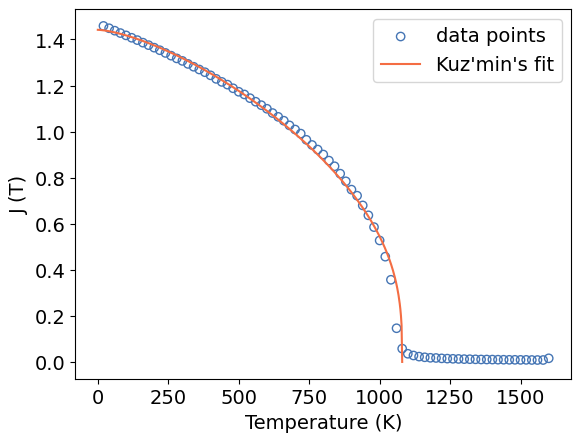

In [14]:
# define the form of the function you want to fit
fn = dataDirMC + '/M(T)'  # magnetic polarization
TK, Js = dtf.read2coldata(fn)

with open(dataDirMC + '/momfile', 'rt') as f:
    n_atoms = len(f.read().splitlines())
print(f'Number of atoms: {n_atoms}')

Js = [item*n_atoms/ucvA*11.654 for item in Js]

poscut = np.argmin(np.diff(Js)/np.diff(TK))+2
Tc = TK[poscut]
print(f'Tc = {Tc} K')
TKc = TK[:poscut].copy()
Jsc = Js[:poscut].copy()

xfine = np.linspace(0, Tc, 500)
p    = 5.0 / 2
beta = 1. / 3
m_s = partial(dtf.spontaneous_magnetization, p=p, beta=beta, T_C=Tc)

popt, pcov = curve_fit(m_s, TKc, Jsc)
Js_0, s = popt
print(Js_0, s)
T_fit = np.linspace(min(TKc), max(TKc), 500)
Js_fit = m_s(T_fit, Js_0, s)

g = 2
k_b = physical_constants["Boltzmann constant"][0]
mu_b = physical_constants["Bohr magneton"][0]

M_0 = Js_0/mu_0
D = (0.1509
     * ((g * mu_b) / (s * beta * M_0)) ** (2. / 3)
     * k_b
     * Tc
     )
print("spin wave stiffness constant ",D)
A_0 = M_0 * D / (2 * g * mu_b)
print("exchange constant at T=0",A_0)

Js_300 = m_s(300., Js_0, s)
print("Js_300 (T)",Js_300)

A_300 = A_0*(Js_300/Js_0)**2
print("A_300 (J/m)",A_300)

K_300 = K*(Js_300/Js_0)**3
print("K_300 (MJ/m)",K_300/1e6)

# A = A_0*(Js/Js0)^2
print(A_300)
print(Js_300)
print('Lex ',np.sqrt(mu_0*A_300/(Js_300*Js_300))/1e-9)


plt.scatter(TK, Js, marker="o", label="data points", facecolors='none', edgecolors='#4575b4')
label = "Kuz'min's fit"  # fr"fit $f(x) = ax^2 + bx + c$ with {a=:.3} {b=:.3} {c=:.3}"
plt.plot(xfine, m_s(xfine, Js_0, s), label=label, color='#f46d43')
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("J (T)")
# plt.style.use('seaborn-v0_8')
plt.show()
plt.close()